#Spam classifier 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import re 
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df['text']= df['v1'] + ' ' + df['v2']
df.drop(columns=['v2'], inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [3]:
for i in range(50):
    print(df.iloc[i])
    print()

label                                                  ham
text     ham Go until jurong point, crazy.. Available o...
Name: 0, dtype: object

label                                  ham
text     ham Ok lar... Joking wif u oni...
Name: 1, dtype: object

label                                                 spam
text     spam Free entry in 2 a wkly comp to win FA Cup...
Name: 2, dtype: object

label                                                  ham
text     ham U dun say so early hor... U c already then...
Name: 3, dtype: object

label                                                  ham
text     ham Nah I don't think he goes to usf, he lives...
Name: 4, dtype: object

label                                                 spam
text     spam FreeMsg Hey there darling it's been 3 wee...
Name: 5, dtype: object

label                                                  ham
text     ham Even my brother is not like to speak with ...
Name: 6, dtype: object

label                                 

In [4]:
df.head()

,label,text
0,ham,"ham Go until jurong point, crazy.. Available o..."
1,ham,ham Ok lar... Joking wif u oni...
2,spam,spam Free entry in 2 a wkly comp to win FA Cup...
3,ham,ham U dun say so early hor... U c already then...
4,ham,"ham Nah I don't think he goes to usf, he lives..."


In [5]:
sn=SnowballStemmer('english')  #Reduces the dimensionality . 
stop=set(stopwords.words('english')) #This removes the some not so important words from the text like they,is ,are etc. 

In [6]:
def clean_text(sms):
    sms = str(sms).lower()
    sms= sms.lower()
    sms=re.sub("[^a-z0-9]",' ',sms ) # It means if there is any character not in between a-z or 0-9 replace it with the space in sms .
    sms=nltk.word_tokenize(sms) #Breaks the sentences into small segments of words . 
    sms=[t for t in sms if len(t)>1]  #This is done to the word tokens .
    sms=[sn.stem(word) for word in sms if word not in stop]
    sms=' '.join(sms)
    return sms 

In [7]:
clean_text('Get your UNLIMITED data >>>???<<<< !!!!at 100 rupees ')

'get unlimit data 100 rupe'

In [8]:
df

,label,text
0,ham,"ham Go until jurong point, crazy.. Available o..."
1,ham,ham Ok lar... Joking wif u oni...
2,spam,spam Free entry in 2 a wkly comp to win FA Cup...
3,ham,ham U dun say so early hor... U c already then...
4,ham,"ham Nah I don't think he goes to usf, he lives..."
...,...,...
5567,spam,spam This is the 2nd time we have tried 2 cont...
5568,ham,ham Will Ì_ b going to esplanade fr home?
5569,ham,"ham Pity, * was in mood for that. So...any oth..."
5570,ham,ham The guy did some bitching but I acted like...


In [9]:
df['clean text']=df['text'].apply(clean_text)

In [10]:
df.head()

,label,text,clean text
0,ham,"ham Go until jurong point, crazy.. Available o...",ham go jurong point crazi avail bugi great wor...
1,ham,ham Ok lar... Joking wif u oni...,ham ok lar joke wif oni
2,spam,spam Free entry in 2 a wkly comp to win FA Cup...,spam free entri wkli comp win fa cup final tkt...
3,ham,ham U dun say so early hor... U c already then...,ham dun say earli hor alreadi say
4,ham,"ham Nah I don't think he goes to usf, he lives...",ham nah think goe usf live around though


In [11]:
#Visualising the frequencies of words 
from wordcloud import WordCloud

In [12]:
hamdata=df[df['label']=='ham']
hamdata=hamdata['clean text']

In [13]:
hamdata

0       ham go jurong point crazi avail bugi great wor...
1                                 ham ok lar joke wif oni
3                       ham dun say earli hor alreadi say
4                ham nah think goe usf live around though
6       ham even brother like speak treat like aid patent
                              ...                        
5565                                          ham huh lei
5568                              ham go esplanad fr home
5569                                ham piti mood suggest
5570    ham guy bitch act like interest buy someth els...
5571                                   ham rofl true name
Name: clean text, Length: 4825, dtype: object

In [14]:
def wordCloud(data):
    words=' '.join(data)
    wc=WordCloud()
    wc=wc.generate(words)
    
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

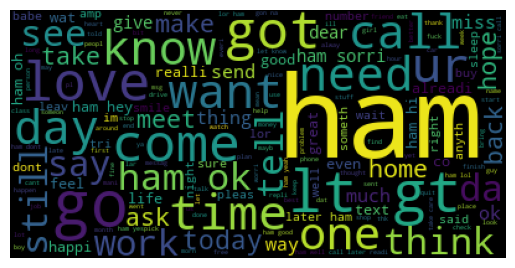

In [15]:
wordCloud(hamdata)

In [16]:
spamdata=df[df['label']=='spam']
spamdata=spamdata['clean text']

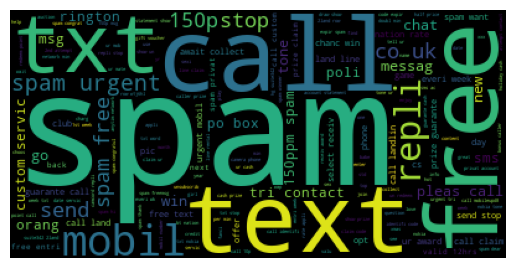

In [17]:
wordCloud(spamdata)

Featurization 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

In [19]:
cv=CountVectorizer(max_features=5000)

In [20]:
X=cv.fit_transform(df['text'])

In [21]:
X=X.toarray()

In [22]:
y=pd.get_dummies(df['label'])
y=y['spam'].values

In [23]:
y

array([False, False,  True, ..., False, False, False])

In [24]:
#Model Building 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [27]:
from sklearn.naive_bayes import MultinomialNB 

In [28]:
model=MultinomialNB()

In [29]:
model.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_test , y_pred 

(array([False, False, False, ...,  True, False, False]),
 array([False, False, False, ...,  True, False, False]))

In [32]:
pd.DataFrame({'Actual':y_test , 'Predicted':y_pred}).head()

,Actual,Predicted
0,False,False
1,False,False
2,False,False
3,False,False
4,True,True


In [33]:
#Model Evaluation 

In [34]:
score=model.score(X_train,y_train)
print("Accuracy on training  data :",score)

Accuracy on training  data : 0.998660594695955


In [35]:
score=model.score(X_test,y_test)
print("Accuracy on testing  data :",score)

Accuracy on testing  data : 0.9945622620989668


In [36]:
from sklearn.metrics import confusion_matrix, f1_score,classification_report

In [37]:
confusion_matrix(y_test, y_pred)

array([[1580,    1],
       [   9,  249]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      1581
        True       1.00      0.97      0.98       258

    accuracy                           0.99      1839
   macro avg       1.00      0.98      0.99      1839
weighted avg       0.99      0.99      0.99      1839



In [39]:
f1_score(y_test,y_pred)

0.9803149606299213